In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("orig_train.csv")

In [3]:
data.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


### Opisy komórek ciągłych
- age - wiek osoby
- household_members - liczba osób w gospodarstwie domowym
- no_of_dependents - liczba osób zależnych finansowo od tej konkretnej osoby
- income - dochód miesięczny
- work_seniority - staż pracy/ doświadczenie zawodowe w danej branży
- business age - wiek firmy ???? do sprawdzenia
- lenghth_relationship_with_client - długość relacji z klientem
- debit_card - posiadanie karty debetowej
- current_account - posiadanie rachunku bieżącego przez klienta
- saving_account - posiadanie rachunku oszczędnościowego przez klienta
- salary_account - posiadanie konta przeznaczonego do otrzymywania wynagrodzeń klienta
- foreign_account - posiadanie konta zagranicznego/ rachunku walutowego przez klienta
- finalized_loan - czy proces udzielania kredytu został zakończony?
- deposit - do sprawdzenia
- pension_funds - fundusze emerytalne, pusta kolumna de facto, więc do wywalenia
- default_flag - być może fakt czy klient zalega ze spłatą lub nie?

### Opisy komórek tekstowych ###
- product - prawdopodobnie typ kredytu/ usługi
- area - obszar zamieszkiwania klienta
- residential_place - miejsce zamieszkiwania - owner without mortgage - właściciel mieszkania bez kredytu, - owner with mortgage - właściciel z kredytem, rental - najemca, living with family - mieszkanie z rodziną, other - inne
- education - najwyższy zdobyty poziom edukacji
- martial status - status matrymonialny - singiel, wdowa, w małżeństwie, rozwiedziony
- economic sector - branża działalności gospodarczej
- employee_no - liczba pracowników

In [11]:
# Summary statistics for numerical features
numerical_summary = data.describe()

numerical_summary

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [12]:
# Frequency counts for categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = data[categorical_columns].describe()

categorical_summary

,PRODUCT,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,ECONOMIC_SECTOR,EMPLOYEE_NO
count,15097,15097,15097,15097,15097,15097,15097
unique,6,4,5,10,4,18,9
top,C,County capital,Owner without mortgage,University,married,Missing,Missing
freq,6779,7586,8457,5457,8141,4009,3338


In [9]:
data["AREA"].unique()

array(['County capital', 'Urban area', 'Rural area', 'Missing'],
      dtype=object)

In [8]:
data["PRODUCT"].unique()

array(['C', 'F', 'B', 'E', 'D', 'A'], dtype=object)

In [10]:
data["RESIDENTIAL_PLACE"].unique()

array(['Owner without mortgage', 'Living with family',
       'Owner with mortgage', 'Rental', 'Other'], dtype=object)

In [11]:
data["EDUCATION"].unique()

array(['University', 'Post-graduate', 'Highschool', 'Missing',
       'Post secondary school', 'Other', 'College', 'Vocational school',
       'Middle school', 'Primary school'], dtype=object)

In [12]:
data["MARITAL_STATUS"].unique()

array(['married', 'divorced', 'single', 'widow'], dtype=object)

In [13]:
data["ECONOMIC_SECTOR"].unique()

array(['Missing', 'Other', 'Education', 'Manufacturing',
       'Public administration and defence', 'Wholesale and retail trade',
       'Human health and social work activities',
       'Professional, scientific and technical activities',
       'Electricity and gas', 'Transportation and storage',
       'Construction', 'Water supply', 'Mining and quarrying',
       'Information and communication',
       'Agriculture, hunting and forestry',
       'Financial and insurance activities',
       'Accommodation and food service activities',
       'Real estate activities'], dtype=object)

In [7]:
# Binary columns 

binary_columns = [col for col in data.columns if data[col].dropna().isin([0, 1]).all() ]

# Summary table for binary columns

binary_summary = data[binary_columns].apply(pd.Series.value_counts).T

binary_summary

,0,1
DEBIT_CARD,9298.0,5799.0
CURRENT_ACCOUNT,7768.0,7329.0
SAVING_ACCOUNT,15091.0,6.0
SALARY_ACCOUNT,13237.0,1860.0
FOREIGN_ACCOUNT,15095.0,2.0
FINALIZED_LOAN,12618.0,2479.0
DEPOSIT,15041.0,56.0
PENSION_FUNDS,15097.0,NaN
DEFAULT_FLAG,14233.0,864.0


In [6]:
# Distribution of DEFAULT_FLAG: About 94.3% of the clients in the dataset have no default value (DEFAULT_FLAG = 0), 
# while approximately 5.7% have (DEFAULT_FLAG = 1). This strongly unbalanced distribution indicates that we will need to
# apply class-balancing techniques or adjust model evaluation metrics accordingly to avoid biases 
# in favour of the dominant class.

In [ ]:
# Distribution of SAVING_ACCOUNT, FOREIGN_ACCOUNT and DEPOSIT is very skewed and we might want to remove these rows in the future

In [14]:
# Checking for missing values
missing_values = data.isnull().sum()

missing_values

PRODUCT                            0
AGE                                0
AREA                               0
RESIDENTIAL_PLACE                  0
EDUCATION                          0
MARITAL_STATUS                     0
HOUSEHOLD_MEMBERS                  0
NO_OF_DEPENDENTS                   0
INCOME                             0
WORK_SENIORITY                     0
BUSINESS AGE                       0
ECONOMIC_SECTOR                    0
EMPLOYEE_NO                        0
LENGTH_RELATIONSHIP_WITH_CLIENT    0
DEBIT_CARD                         0
CURRENT_ACCOUNT                    0
SAVING_ACCOUNT                     0
SALARY_ACCOUNT                     0
FOREIGN_ACCOUNT                    0
FINALIZED_LOAN                     0
DEPOSIT                            0
PENSION_FUNDS                      0
DEFAULT_FLAG                       0
dtype: int64

In [15]:
# Missing values in this csv are marked as "Missing"
# Proportion of missing values
missing_proportions = {}
for column in categorical_columns:
    total = len(data[column])
    missing_count = sum(data[column] == 'Missing')
    missing_proportions[column] = (missing_count / total) * 100

missing_proportions_df = pd.DataFrame(missing_proportions.items(), columns=['Column', 'Missing Proportion (%)'])

missing_proportions_df

,Column,Missing Proportion (%)
0,PRODUCT,0.000000
1,AREA,0.218586
2,RESIDENTIAL_PLACE,0.000000
3,EDUCATION,4.577068
4,MARITAL_STATUS,0.000000
5,ECONOMIC_SECTOR,26.554945
6,EMPLOYEE_NO,22.110353


In [ ]:
# As the number of missing data in the columns EMPLOYEE_NO and ECONOMIC_SECTOR exceeds 20 % we will try to remove these columns

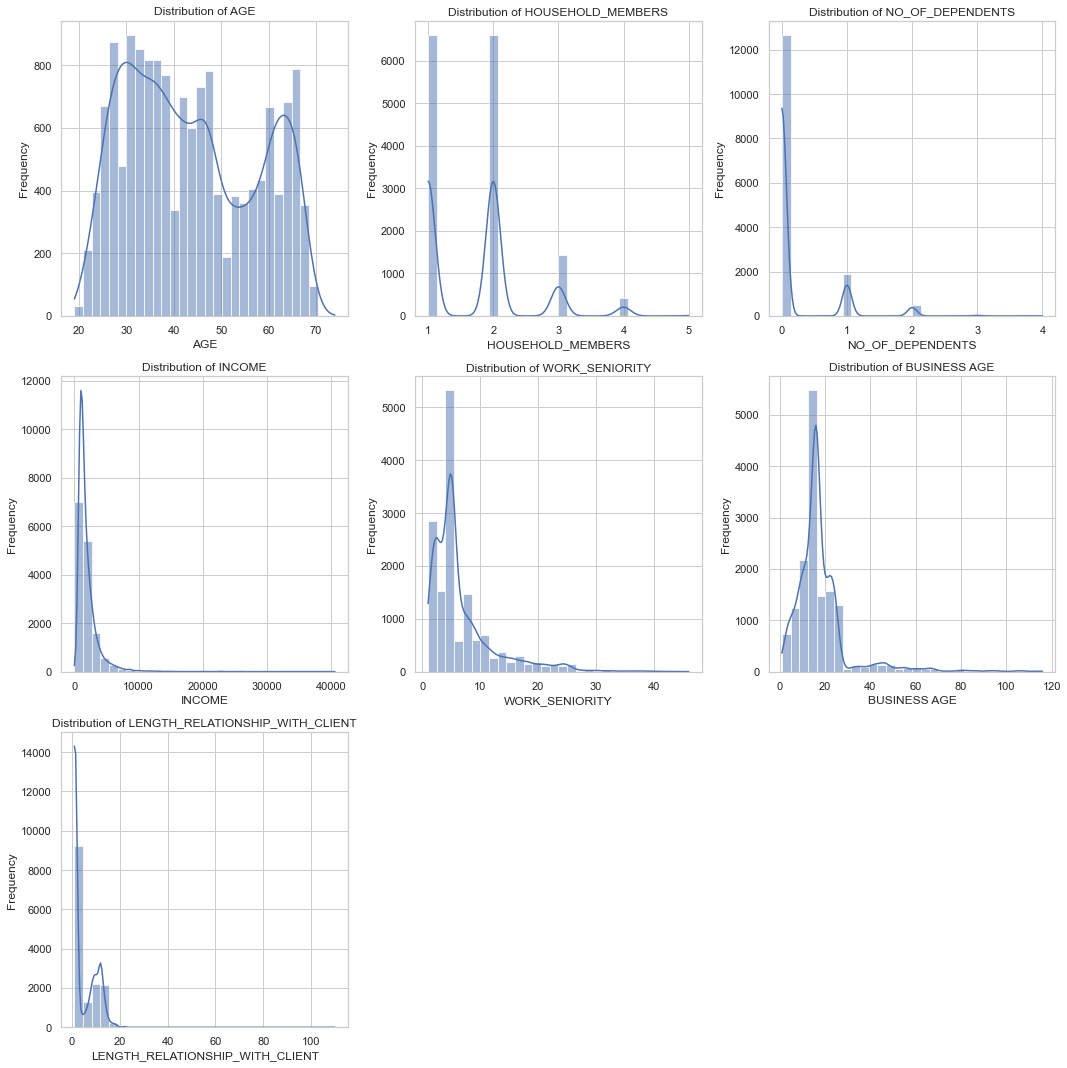

In [16]:
sns.set(style="whitegrid")

# Subset of numerical columns for visualization
numerical_columns = ['AGE', 'HOUSEHOLD_MEMBERS', 'NO_OF_DEPENDENTS','INCOME', 'WORK_SENIORITY', 'BUSINESS AGE', 'LENGTH_RELATIONSHIP_WITH_CLIENT']

# Plotting histograms for the selected numerical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

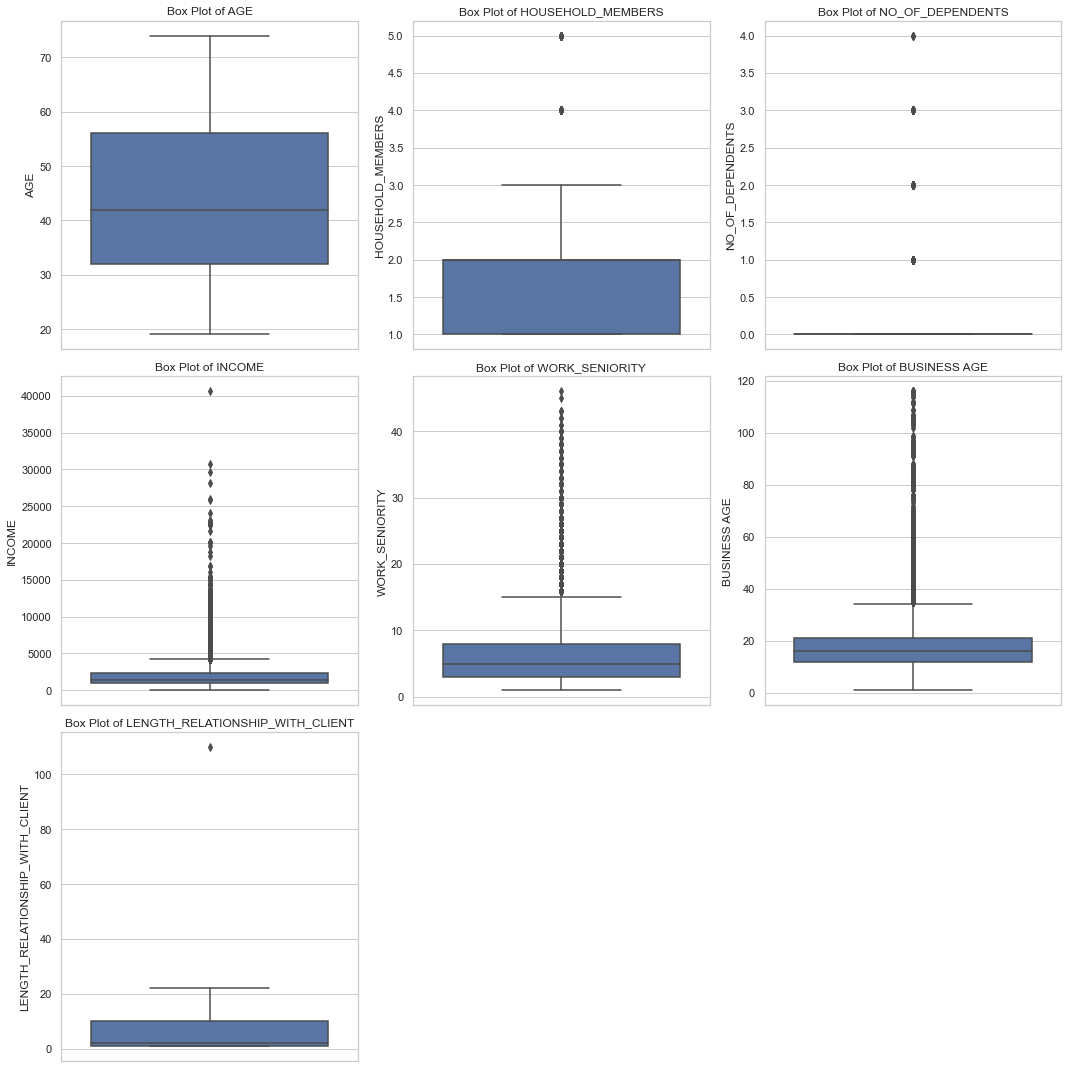

In [17]:
# Plotting box plots for the selected numerical features

plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

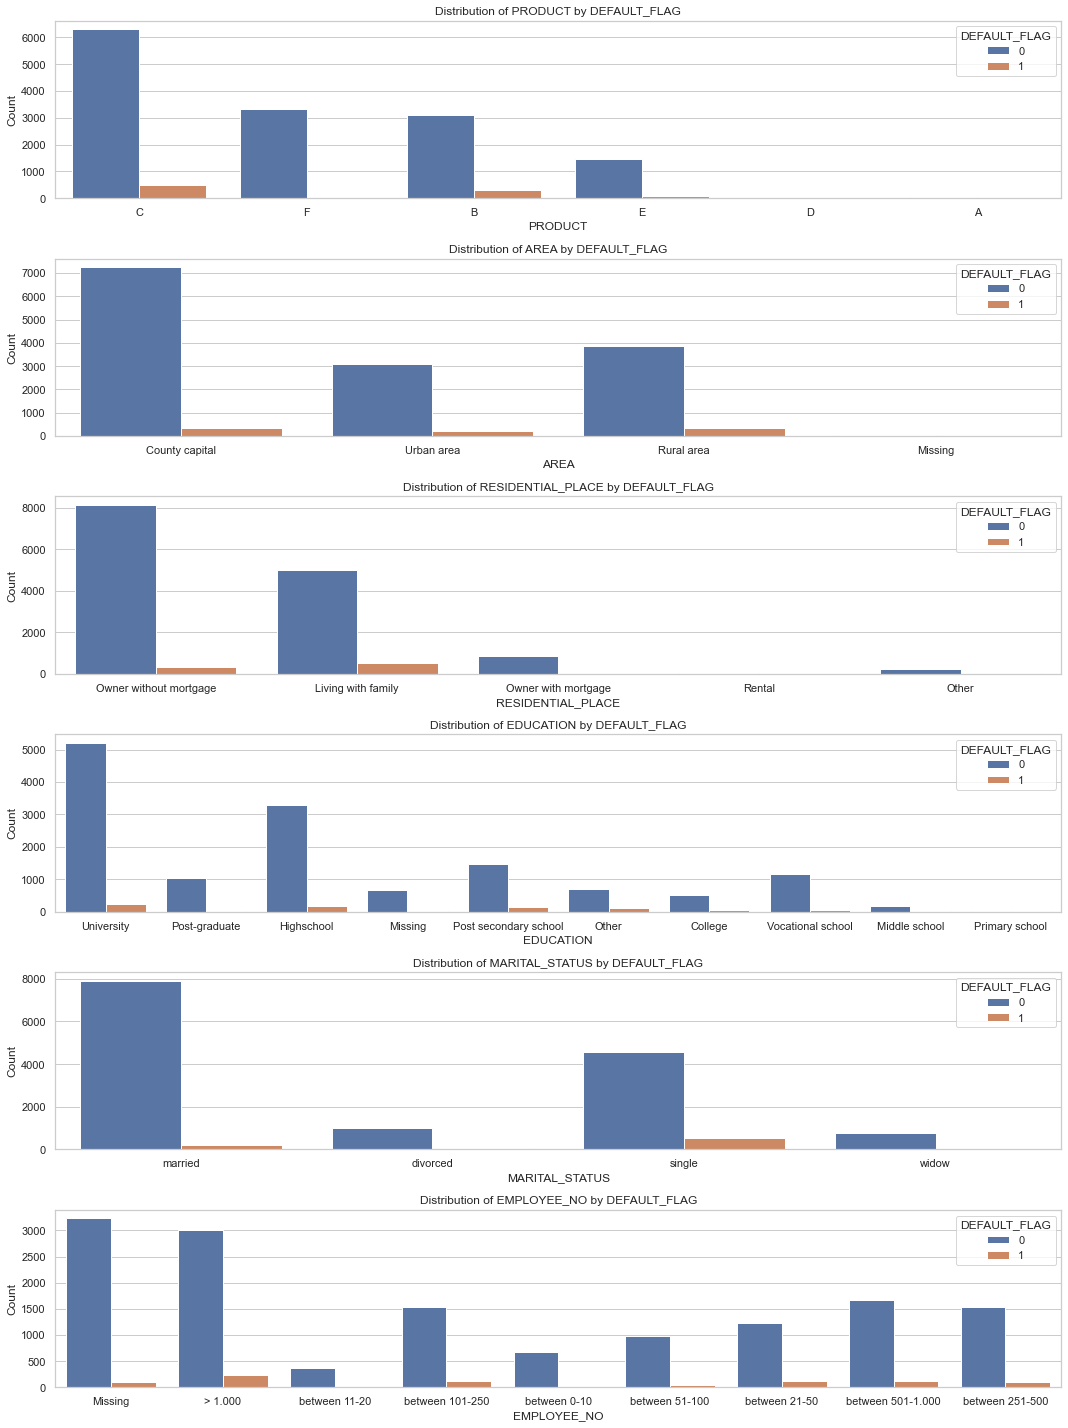

In [18]:
# Plotting bar plots for the selected categorical features against the DEFAULT_FLAG

categorical_columns = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS', 'EMPLOYEE_NO']
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 1, i)
    sns.countplot(x=column, hue='DEFAULT_FLAG', data=data)
    plt.title(f'Distribution of {column} by DEFAULT_FLAG')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='DEFAULT_FLAG', loc='upper right')

plt.tight_layout()
plt.show()

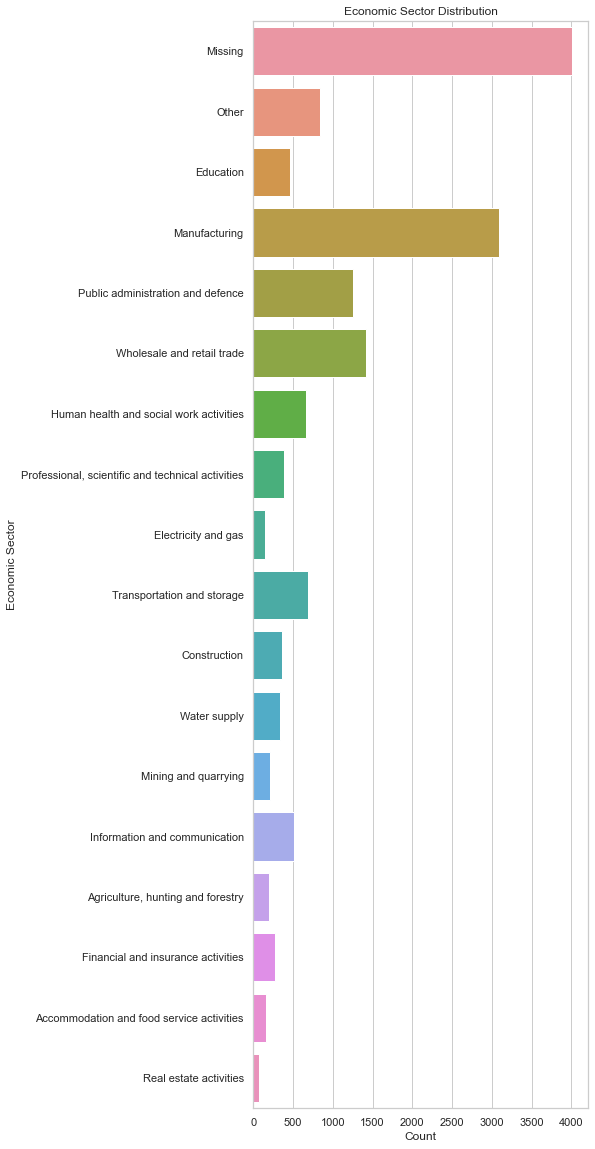

In [19]:
# I have changed the orientation of the plot so that the values on the axis can be readable
plt.figure(figsize=(6, 20)) 
sns.countplot(y='ECONOMIC_SECTOR', data=data) 
plt.title('Economic Sector Distribution')
plt.xlabel('Count')
plt.ylabel('Economic Sector') 
plt.show()

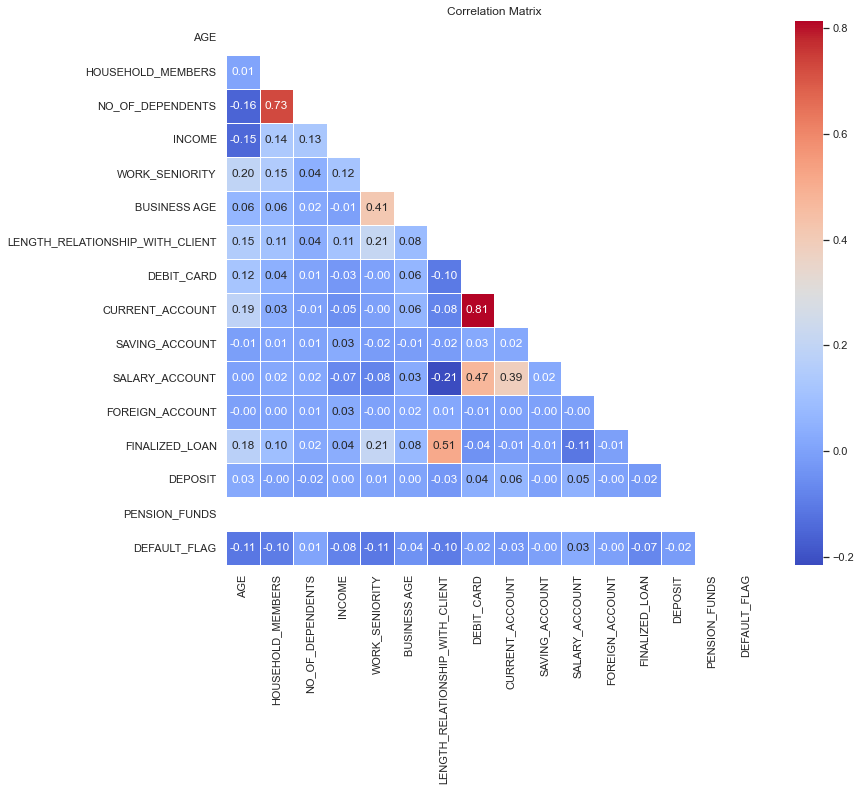

In [20]:
# Correlation matrix
corr = data.corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))

# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
data.groupby(["PRODUCT","DEFAULT_FLAG"]).agg("size").reset_index(name="count")


,PRODUCT,DEFAULT_FLAG,count
0,A,0,42
1,B,0,3099
2,B,1,308
3,C,0,6309
4,C,1,470
5,D,0,13
6,E,0,1447
7,E,1,75
8,F,0,3323
9,F,1,11


In [ ]:
# Product D shows up only 13 times - we might want to delete these observations

In [16]:
data.groupby(["AREA","DEFAULT_FLAG"]).size().reset_index()

,AREA,DEFAULT_FLAG,0
0,County capital,0,7253
1,County capital,1,333
2,Missing,0,32
3,Missing,1,1
4,Rural area,0,3861
5,Rural area,1,331
6,Urban area,0,3087
7,Urban area,1,199


In [23]:
data.groupby(["RESIDENTIAL_PLACE","DEFAULT_FLAG"]).size().reset_index()

,RESIDENTIAL_PLACE,DEFAULT_FLAG,0
0,Living with family,0,4988
1,Living with family,1,517
2,Other,0,221
3,Other,1,25
4,Owner with mortgage,0,859
5,Owner with mortgage,1,2
6,Owner without mortgage,0,8137
7,Owner without mortgage,1,320
8,Rental,0,28


In [24]:
data.groupby(["EDUCATION","DEFAULT_FLAG"]).size().reset_index()

,EDUCATION,DEFAULT_FLAG,0
0,College,0,503
1,College,1,59
2,Highschool,0,3289
3,Highschool,1,162
4,Middle school,0,170
5,Middle school,1,25
6,Missing,0,664
7,Missing,1,27
8,Other,0,705
9,Other,1,114


In [25]:
data.groupby(["MARITAL_STATUS","DEFAULT_FLAG"]).size().reset_index()

,MARITAL_STATUS,DEFAULT_FLAG,0
0,divorced,0,991
1,divorced,1,54
2,married,0,7914
3,married,1,227
4,single,0,4560
5,single,1,553
6,widow,0,768
7,widow,1,30


In [26]:
data.groupby(["HOUSEHOLD_MEMBERS","DEFAULT_FLAG"]).size().reset_index()

,HOUSEHOLD_MEMBERS,DEFAULT_FLAG,0
0,1,0,6029
1,1,1,583
2,2,0,6381
3,2,1,227
4,3,0,1389
5,3,1,40
6,4,0,419
7,4,1,11
8,5,0,15
9,5,1,3


In [28]:
data.groupby(["NO_OF_DEPENDENTS","DEFAULT_FLAG"]).size().reset_index()

,NO_OF_DEPENDENTS,DEFAULT_FLAG,0
0,0,0,11961
1,0,1,710
2,1,0,1753
3,1,1,127
4,2,0,488
5,2,1,22
6,3,0,27
7,3,1,5
8,4,0,4


In [31]:
data.groupby(["INCOME","DEFAULT_FLAG"]).size().reset_index()

,INCOME,DEFAULT_FLAG,0
0,0.00,0,32
1,0.00,1,9
2,143.33,0,1
3,174.66,0,1
4,187.00,0,1
...,...,...,...
8253,26028.75,0,1
8254,28147.56,0,1
8255,29725.00,0,1
8256,30746.00,0,1


In [32]:
data.groupby(["WORK_SENIORITY","DEFAULT_FLAG"]).size().reset_index()

,WORK_SENIORITY,DEFAULT_FLAG,0
0,1,0,544
1,1,1,79
2,2,0,1936
3,2,1,295
4,3,0,1394
...,...,...,...
63,42,0,1
64,42,1,1
65,43,0,3
66,45,0,1


In [33]:
data.groupby(["BUSINESS AGE","DEFAULT_FLAG"]).size().reset_index().tail(10)     

,BUSINESS AGE,DEFAULT_FLAG,0
143,104,0,2
144,105,0,4
145,106,0,8
146,107,0,5
147,109,0,3
148,111,0,1
149,112,0,4
150,114,0,2
151,115,0,3
152,116,0,6


In [34]:
data.groupby(["ECONOMIC_SECTOR","DEFAULT_FLAG"]).size().reset_index()

,ECONOMIC_SECTOR,DEFAULT_FLAG,0
0,Accommodation and food service activities,0,138
1,Accommodation and food service activities,1,21
2,"Agriculture, hunting and forestry",0,177
3,"Agriculture, hunting and forestry",1,19
4,Construction,0,330
5,Construction,1,28
6,Education,0,454
7,Education,1,6
8,Electricity and gas,0,150
9,Electricity and gas,1,2


In [35]:
data.groupby(["EMPLOYEE_NO","DEFAULT_FLAG"]).size().reset_index()

,EMPLOYEE_NO,DEFAULT_FLAG,0
0,> 1.000,0,3006
1,> 1.000,1,238
2,Missing,0,3229
3,Missing,1,109
4,between 0-10,0,673
5,between 0-10,1,11
6,between 101-250,0,1532
7,between 101-250,1,112
8,between 11-20,0,363
9,between 11-20,1,11


In [37]:
data.groupby(["LENGTH_RELATIONSHIP_WITH_CLIENT","DEFAULT_FLAG"]).size().reset_index()

,LENGTH_RELATIONSHIP_WITH_CLIENT,DEFAULT_FLAG,0
0,1,0,5462
1,1,1,473
2,2,0,2774
3,2,1,203
4,3,0,129
5,3,1,8
6,4,0,172
7,4,1,9
8,5,0,154
9,5,1,12


<AxesSubplot:xlabel='AGE', ylabel='INCOME'>

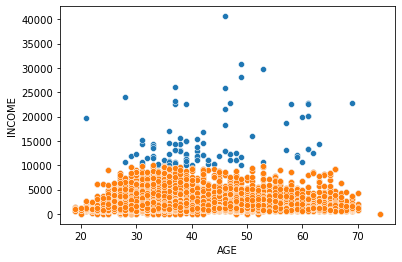

In [17]:
sns.scatterplot(x=data['AGE'],y=data['INCOME'])
filtered_price=data[data["INCOME"]<10000]
sns.scatterplot(x=filtered_price['AGE'],y=filtered_price['INCOME'])

<AxesSubplot:xlabel='AGE', ylabel='INCOME'>

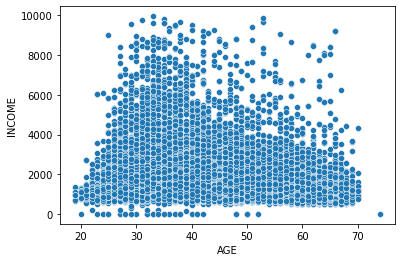

In [18]:
sns.scatterplot(x=filtered_price['AGE'],y=filtered_price['INCOME'])

<AxesSubplot:xlabel='WORK_SENIORITY', ylabel='INCOME'>

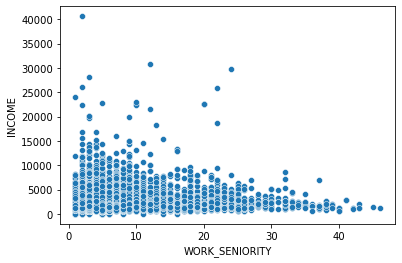

In [20]:
sns.scatterplot(x=data['WORK_SENIORITY'],y=data['INCOME'])

<AxesSubplot:xlabel='WORK_SENIORITY', ylabel='INCOME'>

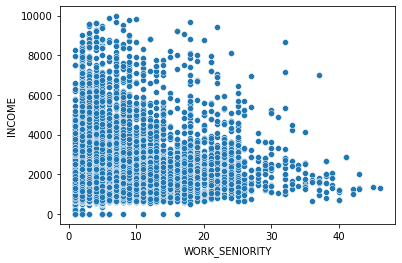

In [21]:
sns.scatterplot(x=filtered_price['WORK_SENIORITY'],y=filtered_price['INCOME'])


In [6]:
# Low variance columns: These columns are highly skewed with a dominant value, reducing their potential predictive power.
columns_to_remove_low_variance = ['SAVING_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEPOSIT', 'PENSION_FUNDS']

# High proportion of missing values: These columns have a significant number of 'MISSING' entries, which might not be informative.
columns_to_remove_high_missing = ['ECONOMIC_SECTOR', 'EMPLOYEE_NO']

# Columns to remove due to concerns of high correlation or redundancy
columns_to_remove_correlation_concerns = ['HOUSEHOLD_MEMBERS', 'DEBIT_CARD']

# All columns to remove
columns_to_remove = columns_to_remove_low_variance + columns_to_remove_high_missing + columns_to_remove_correlation_concerns

# Removing the columns from the dataset
data_cleaned = data.drop(columns=columns_to_remove)


data_cleaned.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,0,1245.0,5,16,1,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,0,1380.0,5,16,8,0,0,0,0
2,F,30,Urban area,Living with family,University,married,0,1131.0,2,6,1,1,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,0,1730.0,9,13,2,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,0,1189.0,5,16,1,1,0,0,0


In [7]:
# Let's check the rows, which are duplicated. We will not remove them, because they may have some value to our model
data_cleaned[data_cleaned.duplicated()].shape[0]


65

In [8]:
# I have removed rows with 'Missing' values in 'AREA'
data_no_missing_area = data_cleaned[data_cleaned['AREA'] != 'Missing']

rows_after_removal = data_no_missing_area.shape[0]
rows_removed = data_cleaned.shape[0] - rows_after_removal

rows_removed, rows_after_removal

(33, 15064)

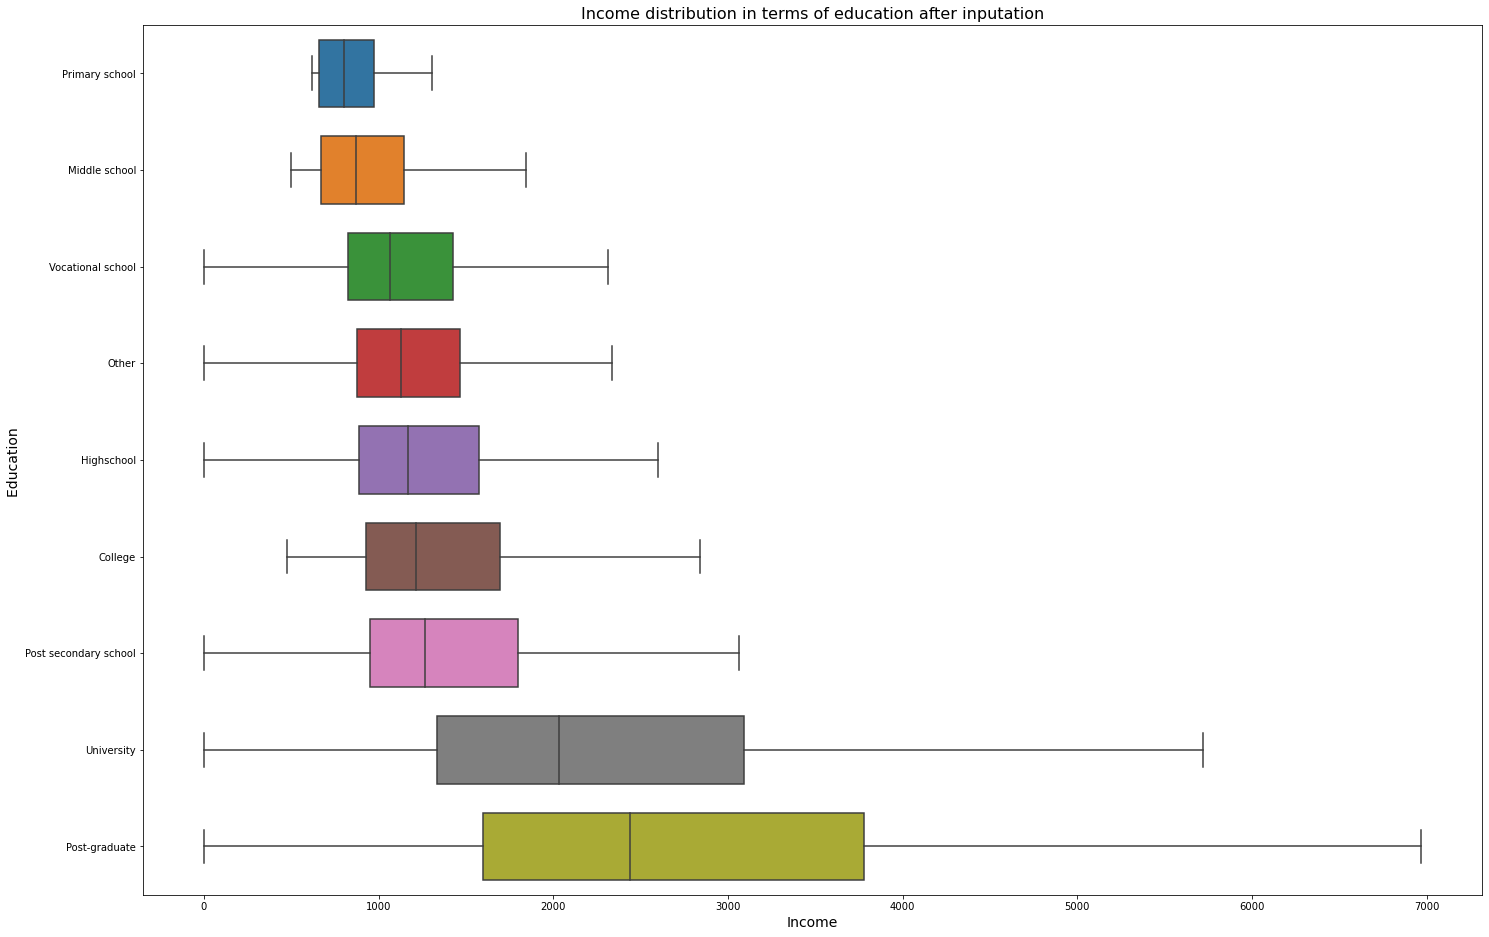

116

In [20]:
plt.figure(figsize=(24, 16))
sns.boxplot(y="EDUCATION", x="INCOME", data=data_no_missing_area, width=0.7, order=order_by_median,showfliers=False)

plt.title('Income distribution in terms of education after inputation', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Education ', fontsize=14)
plt.show()
data_no_missing_area["BUSINESS AGE"].max()

In [9]:
#Let's see the distribution of education in the groups:
education_data_before=data_no_missing_area.groupby("EDUCATION").size().reset_index(name="count_before")
education_data_before

,EDUCATION,count_before
0,College,561
1,Highschool,3444
2,Middle school,195
3,Missing,688
4,Other,817
5,Post secondary school,1617
6,Post-graduate,1042
7,Primary school,28
8,University,5446
9,Vocational school,1226


In [10]:
data_without_missing_education=data_no_missing_area[data_no_missing_area['EDUCATION']!="Missing"]
missing_education_median_incomes=data_without_missing_education.groupby("EDUCATION").median()["INCOME"].reset_index()

def impute_education(row):
    if row['EDUCATION'] == "Missing":
        min_income = float('inf')
        closest_education = "Missing"
        for i in range(len(missing_education_median_incomes)):
            temp = abs(missing_education_median_incomes.at[i, "INCOME"] - row["INCOME"])
            if temp < min_income:
                closest_education = missing_education_median_incomes.at[i, "EDUCATION"]
                min_income = temp
        return closest_education
    else:
        return row['EDUCATION']
data_no_missing_area_copy=data_no_missing_area.copy()

data_no_missing_area_copy.loc[:,'EDUCATION']=data_no_missing_area.apply(impute_education, axis=1)

# Lets see how the distribution looks like now, and how the proportion of education changed

In [11]:
new_row = {'EDUCATION': 'Missing', 'count_after': 0}

education_data_after=data_no_missing_area_copy.groupby("EDUCATION").size().reset_index(name="count_after")
education_data_after=pd.concat([education_data_after.iloc[:3], pd.DataFrame([new_row]), education_data_after.iloc[3:]]).reset_index(drop=True)

education_data_before.merge(education_data_after,on="EDUCATION", suffixes=('_before', '_after')).assign(increase=lambda x: 100*(x['count_after']-x['count_before'])/ x['count_before'])

,EDUCATION,count_before,count_after,increase
0,College,561,585,4.278075
1,Highschool,3444,3464,0.580720
2,Middle school,195,266,36.410256
3,Missing,688,0,-100.000000
4,Other,817,850,4.039168
5,Post secondary school,1617,1735,7.297464
6,Post-graduate,1042,1187,13.915547
7,Primary school,28,157,460.714286
8,University,5446,5534,1.615865
9,Vocational school,1226,1286,4.893964


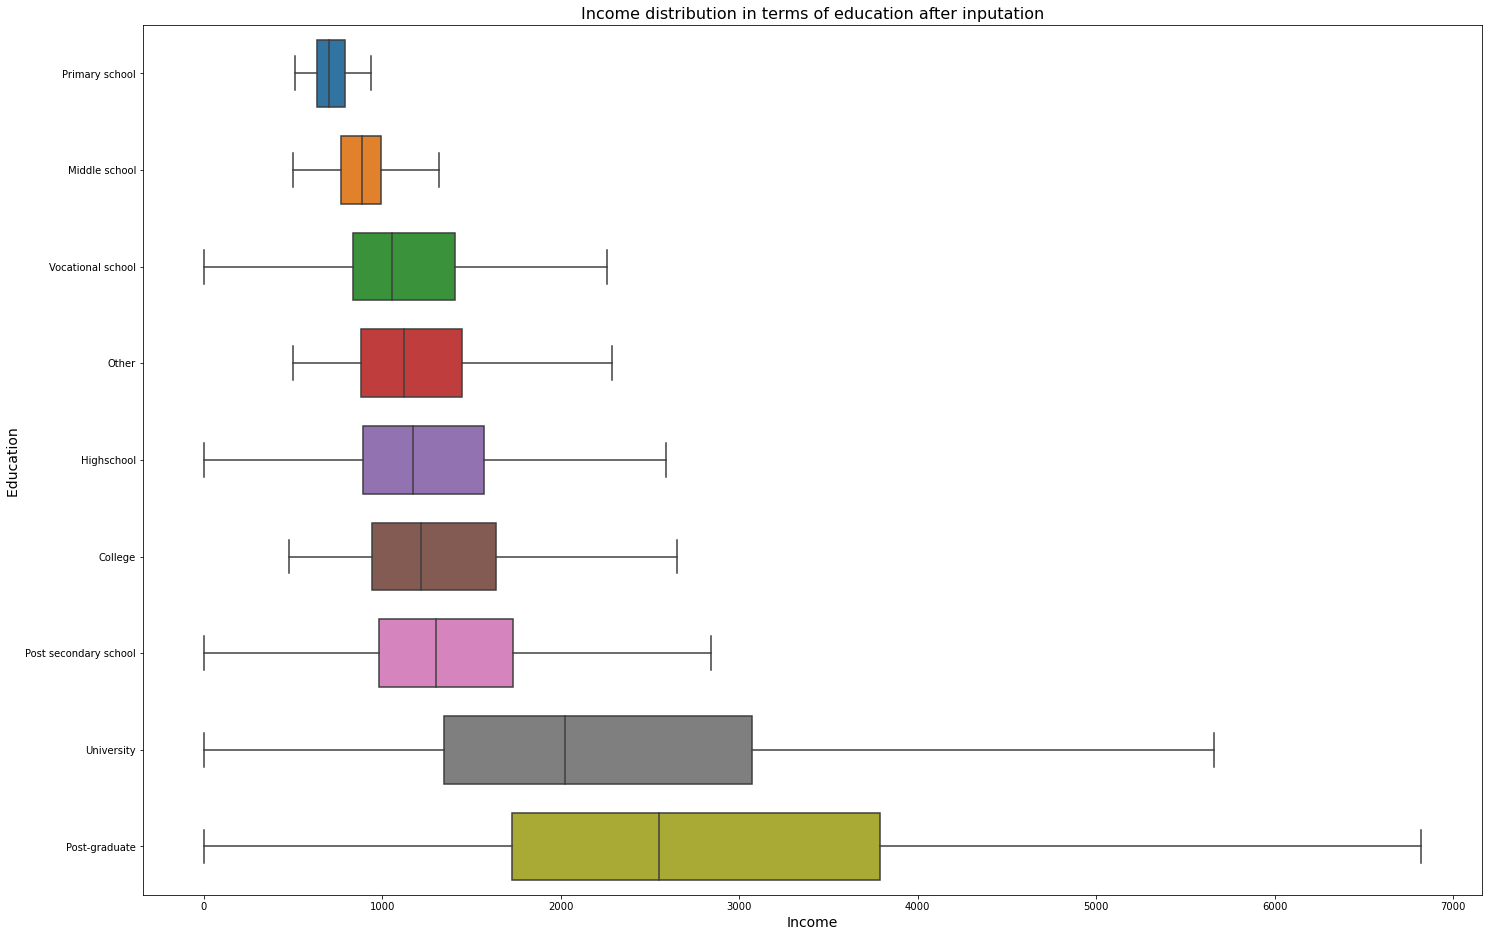

116

In [13]:
# Let's delete showfliers
plt.figure(figsize=(24, 16))
sns.boxplot(y="EDUCATION", x="INCOME", data=data_no_missing_area_copy, width=0.7, order=order_by_median,showfliers=False)

plt.title('Income distribution in terms of education after inputation', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Education ', fontsize=14)
plt.show()
data_no_missing_area["BUSINESS AGE"].max()

In [14]:
# Let's now focus on outliers. We will focus on lower percentile 1% and upper percentile 99% and change all these values
for col in ['AGE', 'WORK_SENIORITY', 'BUSINESS AGE']:
    lower_bound = data_no_missing_area_copy[col].quantile(0.01)
    upper_bound = data_no_missing_area_copy[col].quantile(0.99)
    data_no_missing_area_copy[col] = data_no_missing_area_copy[col].clip(lower=lower_bound, upper=upper_bound)

In [15]:
# Let's change outliers for Income
income_upper_bound = data_no_missing_area_copy['INCOME'].quantile(0.99)
income_median = data_no_missing_area_copy['INCOME'].median()
data_no_missing_area_copy['INCOME'] = np.where(data_no_missing_area_copy['INCOME'] > income_upper_bound, income_median, data_no_missing_area_copy['INCOME'])

In [16]:
# Deleting extraordinary outliers. Firstly let's consider length_relationship_with_client

data_no_outlier_relationship=data_no_missing_area_copy[data_no_missing_area['LENGTH_RELATIONSHIP_WITH_CLIENT']<100]
rows_after_removal=data_no_outlier_relationship.shape[0]
rows_removed = data_no_missing_area_copy.shape[0] - rows_after_removal

rows_removed, rows_after_removal

(1, 15063)

In [17]:
# Now let's take the first column with types of products. We can clearly see that the products A and D have infinitesimal number of appearences
data_no_outlier_products=data_no_outlier_relationship[(data_no_outlier_relationship['PRODUCT']!='A') & (data_no_outlier_relationship['PRODUCT']!='D')]
rows_after_removal=data_no_outlier_products.shape[0]
rows_removed=data_no_outlier_relationship.shape[0]-rows_after_removal

rows_removed, rows_after_removal

(54, 15009)

In [19]:
# # Applying log transformation
# data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'] = np.log1p(data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT'])

# # Plotting the distribution of the transformed LENGTH_RELATIONSHIP_WITH_CLIENT
# plt.figure(figsize=(10, 6))
# sns.histplot(data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'], kde=True, bins=30)
# plt.title('Rozkład długości relacji z klientem po transformacji logarytmicznej')
# plt.xlabel('Logarytm długości relacji z klientem (lata)')
# plt.ylabel('Liczba klientów')
# plt.show()

# # Calculate the skewness after log transformation
# length_relationship_log_skew = data_no_outlier_relationship['LENGTH_RELATIONSHIP_WITH_CLIENT_LOG'].skew()
# length_relationship_log_skew